<center><h1>Advanced Visualization</h1></center>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Movie-Rating.csv")
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [30]:
df.rename(columns = {"Rotten Tomatoes Ratings %":"Critic_Ratings", "Audience Ratings %": "User_Ratings","Budget (million $)":"BudgetMillions", "Year of release":"Year"}, inplace=True)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Critic_Rating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
User_Ratings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [37]:
# df.Film = df.Film.astype('category')
# df.Genre = df.Genre.astype('category')
# df.info()

In [38]:
df[["Film", "Genre","Year"]] = df[["Film", "Genre", "Year"]].astype("category")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   Critic_Rating   559 non-null    int64   
 3   User_Ratings    559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Critic_Rating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
User_Ratings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [68]:
sns.set_style("darkgrid")

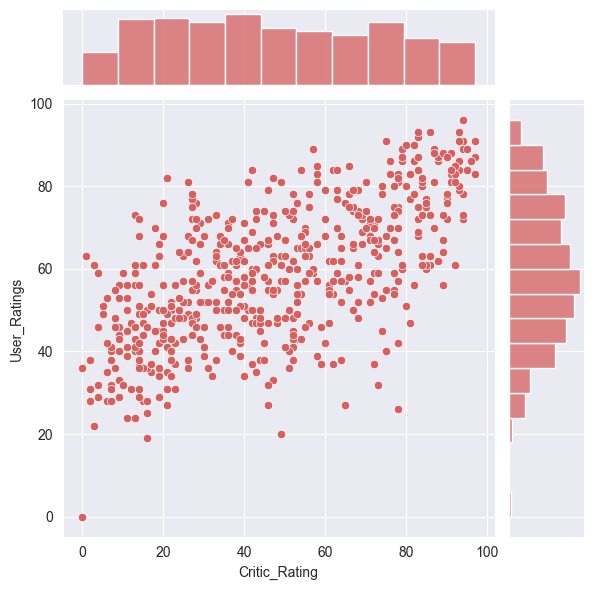

In [69]:
pc = sns.color_palette("muted")
j = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[3])

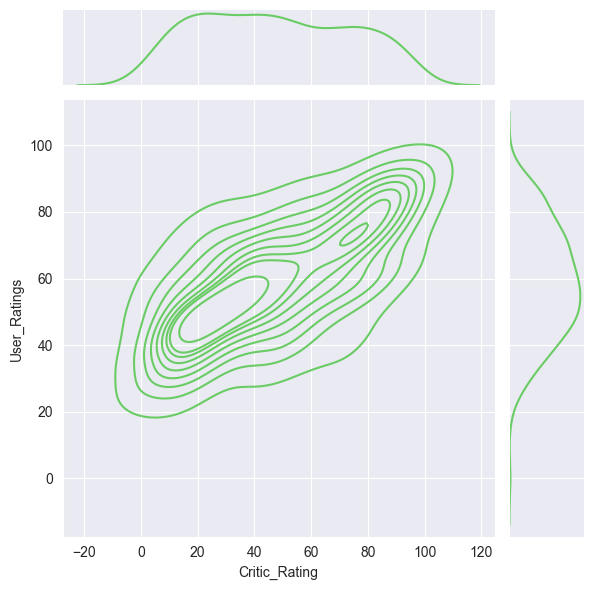

In [70]:
k = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[2], kind = "kde")

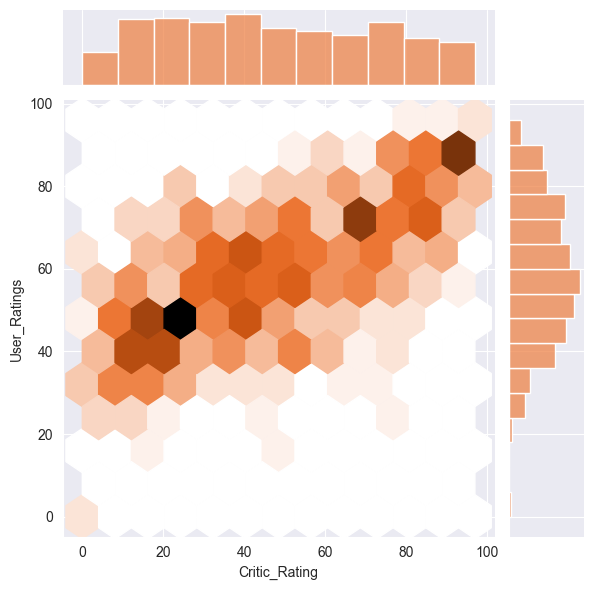

In [71]:
l = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[1], kind = "hex")

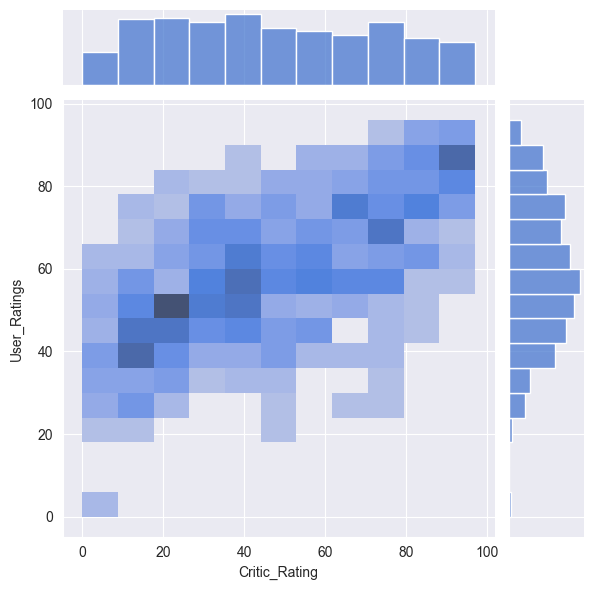

In [72]:
l = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[0], kind = "hist")

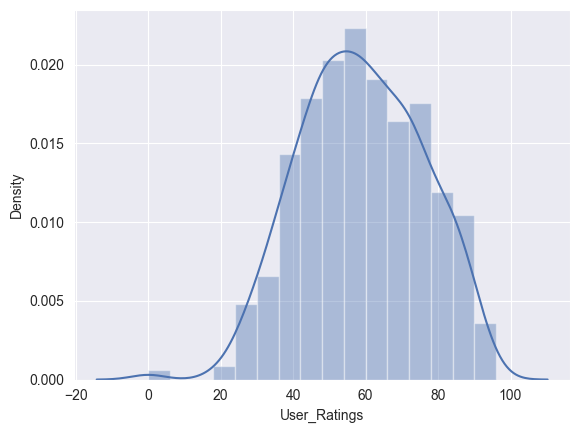

In [73]:
col = sns.color_palette("deep")
n1 = sns.distplot(df.User_Ratings, color = col[0])

<Axes: xlabel='User_Ratings', ylabel='Density'>

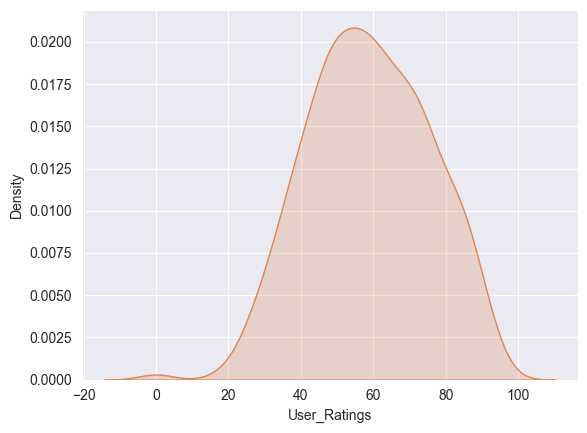

In [74]:
sns.kdeplot(df.User_Ratings, color = col[1], fill = True)

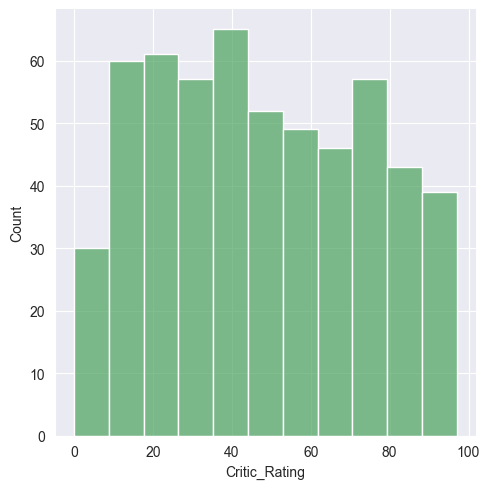

In [75]:
sns.displot(df.Critic_Rating, color = col[2])

<Axes: xlabel='User_Ratings'>

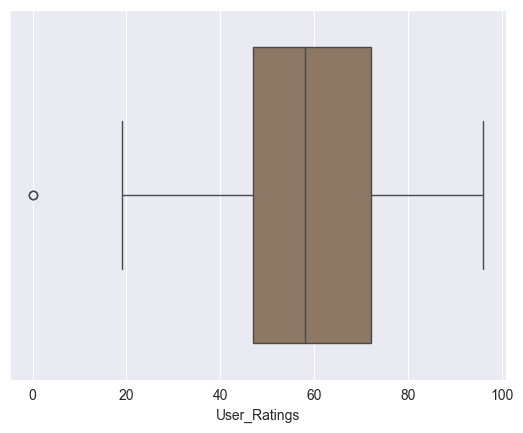

In [76]:
sns.boxplot(x = df.User_Ratings, color = col[5])

<Axes: xlabel='Critic_Rating'>

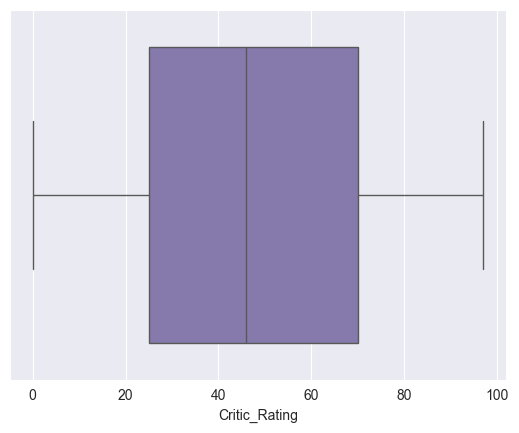

In [78]:
sns.boxplot(x = df.Critic_Rating, color = col[4])

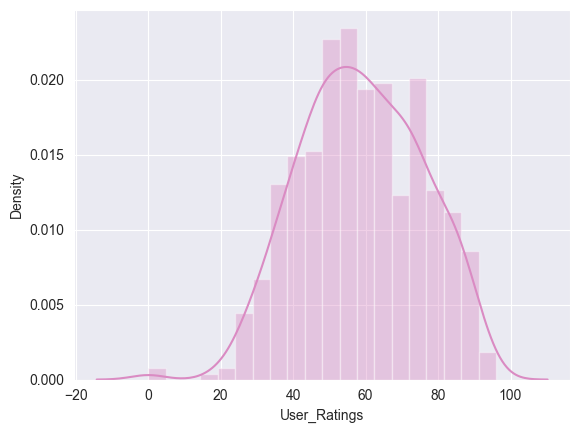

In [81]:
m3 = sns.distplot(df.User_Ratings, color = col[6], bins = 20)

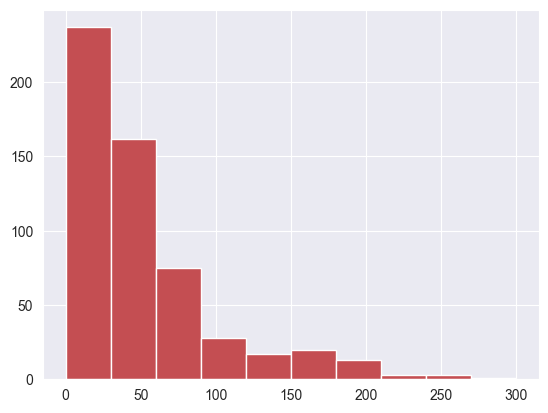

In [ ]:
plt.hist(df.BudgetMillions, color = col[3])
plt.show()

# Lesser movies with high budget, more movies with low budget

In [83]:
df.columns

Index(['Film', 'Genre', 'Critic_Rating', 'User_Ratings', 'BudgetMillions',
       'Year'],
      dtype='object')

In [91]:
df.head()

,Film,Genre,Critic_Rating,User_Ratings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


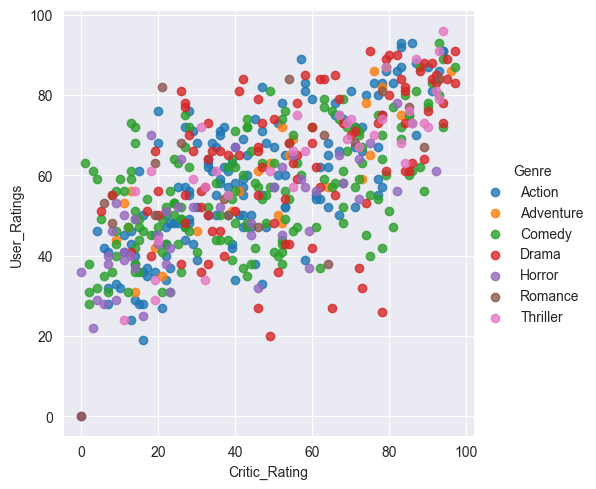

In [ ]:

vis = sns.lmplot(data = df, x = 'Critic_Rating', y = "User_Ratings", hue = "Genre", fit_reg= False)